In [1]:
%matplotlib inline


===============================================
Creating a timeline with lines, dates, and text
===============================================

How to create a simple timeline using Matplotlib release dates.

Timelines can be created with a collection of dates and text. In this example,
we show how to create a simple timeline using the dates for recent releases
of Matplotlib. First, we'll pull the data from GitHub.



In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

# A list of Matplotlib releases and their dates
# Taken from https://api.github.com/repos/matplotlib/matplotlib/releases
names = ['Lime intros scooters',
        'DDOT extends pilot to Aug',
        'Pilot Orig End Date',
        'Lime annouces shift to more scooters',
        'Mobike app goes dark',
        'Ofo announces DC exit', 
        'Mobike announces DC exit',
        'Ofo DC exit',
        'Spin announces DC exit \nwill return as all-scooter fleet', 
        'DDOT extends pilot to Dec w/ new rules',
        'Pilot 2nd End Date']

names.reverse()
dates = ['3/10/2018',
         '4/27/2018',
         '4/30/2018',
         '5/21/2018',
         '7/20/2018',
         '7/24/2018',
         '7/25/2018',
         '7/30/2018',
         '8/17/2018',
         '8/30/2018',
         '8/30/2018']
#dates = [datetime.strptime(ii, "%Y-%m-%dT%H:%M:%SZ") for ii in dates]
dates = [datetime.strptime(ii, "%m/%d/%Y") for ii in dates]
dates.reverse()
dates

[datetime.datetime(2018, 8, 30, 0, 0),
 datetime.datetime(2018, 8, 30, 0, 0),
 datetime.datetime(2018, 8, 17, 0, 0),
 datetime.datetime(2018, 7, 30, 0, 0),
 datetime.datetime(2018, 7, 25, 0, 0),
 datetime.datetime(2018, 7, 24, 0, 0),
 datetime.datetime(2018, 7, 20, 0, 0),
 datetime.datetime(2018, 5, 21, 0, 0),
 datetime.datetime(2018, 4, 30, 0, 0),
 datetime.datetime(2018, 4, 27, 0, 0),
 datetime.datetime(2018, 3, 10, 0, 0)]

Next, we'll iterate through each date and plot it on a horizontal line.
We'll add some styling to the text so that overlaps aren't as strong.

Note that Matplotlib will automatically plot datetime inputs.



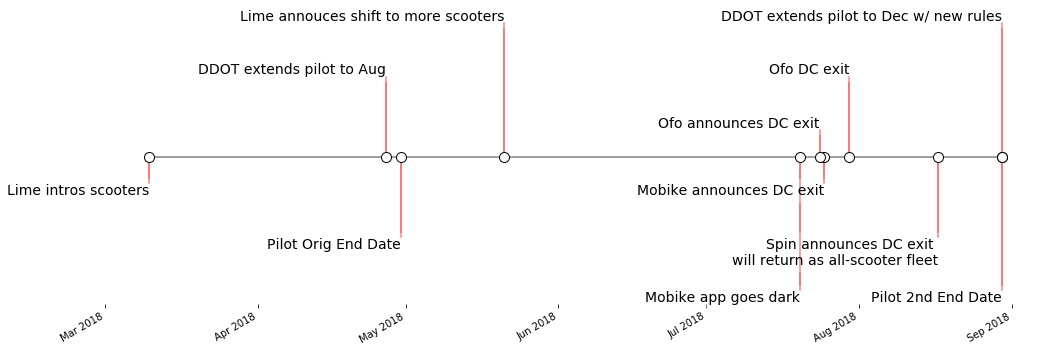

In [7]:
levels = np.array([-5, 5, -3, 3, -1, 1])
fig, ax = plt.subplots(figsize=(17, 6))

# Create the base line
start = min(dates)
stop = max(dates)
ax.plot((start, stop), (0, 0), 'k', alpha=.5)

# Iterate through releases annotating each one
for ii, (iname, idate) in enumerate(zip(names, dates)):
    level = levels[ii % 6]
    vert = 'top' if level < 0 else 'bottom'

    ax.scatter(idate, 0, s=100, facecolor='w', edgecolor='k', zorder=9999)
    # Plot a line up to the text
    ax.plot((idate, idate), (0, level), c='r', alpha=.7)
    # Give the text a faint background and align it properly
    ax.text(idate, level, iname,
            horizontalalignment='right', verticalalignment=vert, fontsize=14,
            backgroundcolor=(1., 1., 1., .3))
#ax.set(title="DoBi Pilot Important Dates since March 2018")
# Set the xticks formatting
# format xaxis with 3 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=1))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
fig.autofmt_xdate()

# Remove components for a cleaner look
plt.setp((ax.get_yticklabels() + ax.get_yticklines() +
          list(ax.spines.values())), visible=False)
plt.show()